<a href="https://colab.research.google.com/github/BoktiarChy/Telecom-Dataset/blob/main/Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the CSV with pandas
data = pd.read_csv('/content/drive/MyDrive/Telecom/Telecom_New.csv')
data.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [ ]:


data.shape

(7043, 21)

In [ ]:
data.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Removing customer IDs from the data set the columns not used in the predictive model.
df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The dataset has a lot of categorical variables rendered as text values (‘Yes’,’No’,etc.) in the columns. Converting the categorical values into numeric values to facilitate ML algorithms to process the data.¶Also, converting Total Charges to a numerical data type

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The dataset has a lot of categorical variables rendered as text values (‘Yes’,’No’,etc.) in the columns. Converting the categorical values into numeric values to facilitate ML algorithms to process the data.¶Also, converting Total Charges to a numerical data type

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above output, it can be seen that, there are 11 missing values for Total Charges. Replacing 11 rows from the data set. Also predictor variable here is Churn. Therefore, it is necessary to convert the predictor variable in binary numeric variable.

From the above output, it can be seen that, there are 11 missing values for Total Charges. Replacing 11 rows from the data set. Also predictor variable here is Churn. Therefore, it is necessary to convert the predictor variable in binary numeric variable.

In [ ]:
df.dropna(inplace = True)

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

SeniorCitizen  ...  PaymentMethod_Mailed check
0              0  ...                           0
1              0  ...                           1
2              0  ...                           1
3              0  ...                           0
4              0  ...                           0

[5 rows x 46 columns]

In [ ]:
df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

#Correlations between customer data features and customer churn


Examining the correlation between churn and each customer feature to decide which features of the data to include in the predictive churn model.

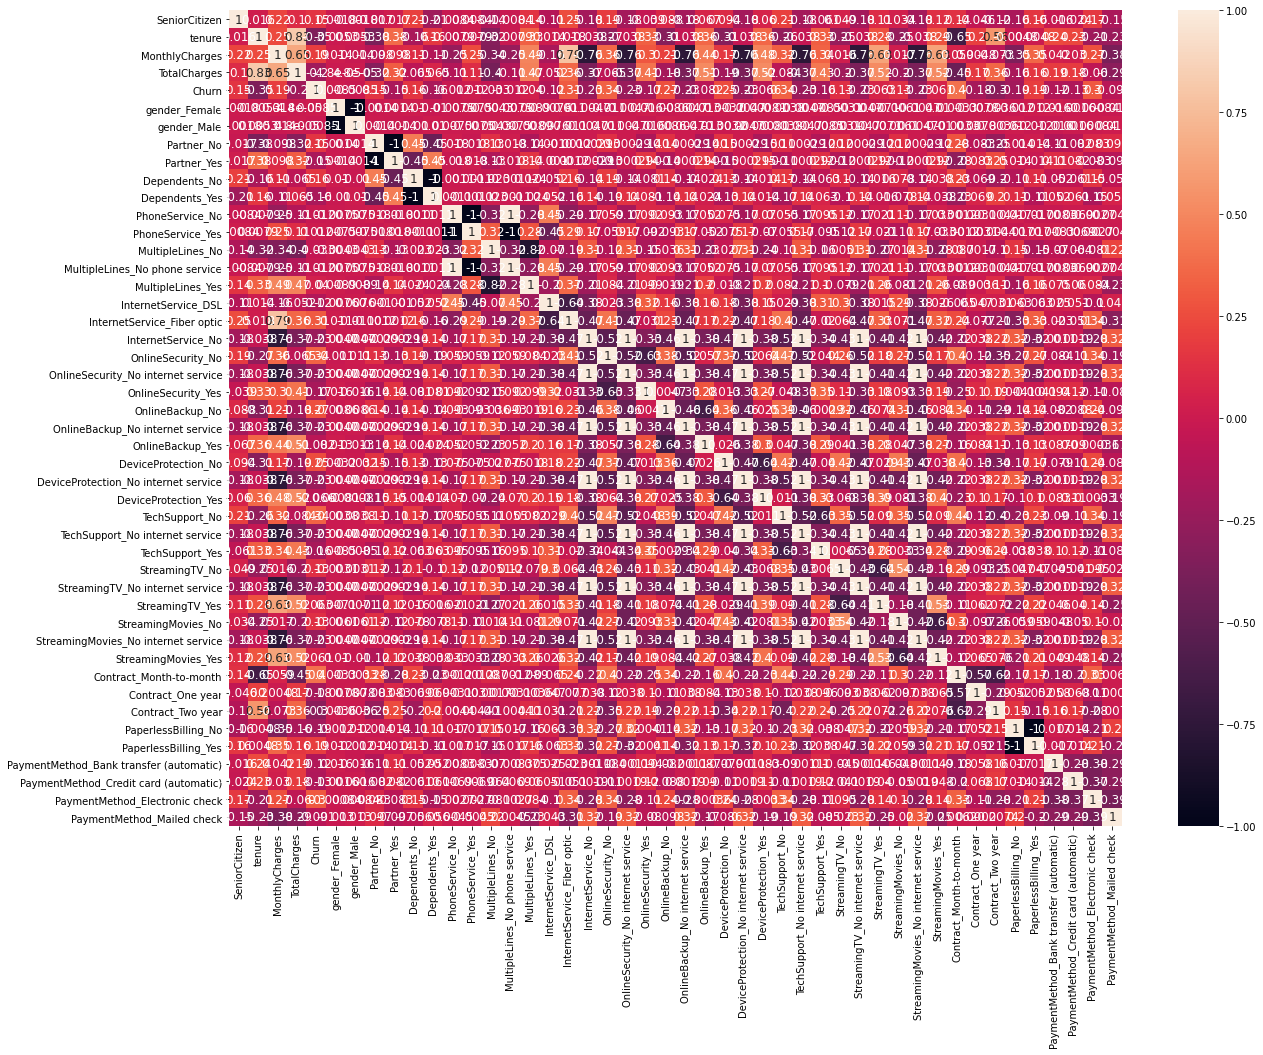

In [ ]:
corr = df_dummies.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

To avoid unstable estimates of coeffiecients in the model, need to drop the ‘TotalCharges’ variable during regression process, as it is highly correlated to both #‘Tenure’ and #‘MonthlyCharges’

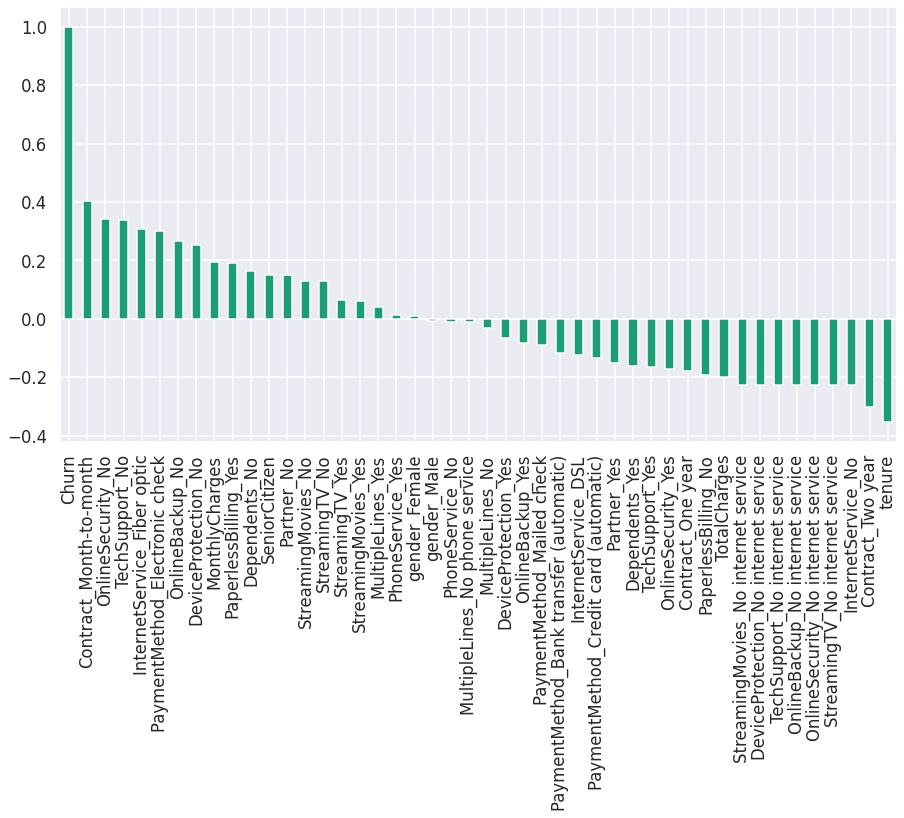

In [ ]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


In [ ]:
df_dummies.corr()  # reporting correlation matrix


SeniorCitizen  ...  PaymentMethod_Mailed check
SeniorCitizen                                 1.000000  ...                   -0.152987
tenure                                        0.015683  ...                   -0.232181
MonthlyCharges                                0.219874  ...                   -0.376568
TotalCharges                                  0.102411  ...                   -0.294708
Churn                                         0.150541  ...                   -0.090773
gender_Female                                 0.001819  ...                   -0.013199
gender_Male                                  -0.001819  ...                    0.013199
Partner_No                                   -0.016957  ...                    0.096948
Partner_Yes                                   0.016957  ...                   -0.096948
Dependents_No                                 0.210550  ...                   -0.056448
Dependents_Yes                               -0.210550  ...                    0.056448
PhoneService_No                              -0.008392  ...                    0.004463
PhoneService_Yes                              0.008392  ...                   -0.004463
MultipleLines_No                             -0.136377  ...                    0.222395
MultipleLines_No phone service               -0.008392  ...                    0.004463
MultipleLines_Yes                             0.142996  ...                   -0.227672
InternetService_DSL                          -0.108276  ...                    0.042754
InternetService_Fiber optic                   0.254923  ...                   -0.305984
InternetService_No                           -0.182519  ...                    0.319694
OnlineSecurity_No                             0.185145  ...                   -0.190919
OnlineSecurity_No internet service           -0.182519  ...                    0.319694
OnlineSecurity_Yes                           -0.038576  ...                   -0.079918
OnlineBackup_No                               0.087539  ...                   -0.098438
OnlineBackup_No internet service             -0.182519  ...                    0.319694
OnlineBackup_Yes                              0.066663  ...                   -0.174075
DeviceProtection_No                           0.094403  ...                   -0.085850
DeviceProtection_No internet service         -0.182519  ...                    0.319694
DeviceProtection_Yes                          0.059514  ...                   -0.187325
TechSupport_No                                0.205254  ...                   -0.186388
TechSupport_No internet service              -0.182519  ...                    0.319694
TechSupport_Yes                              -0.060577  ...                   -0.084631
StreamingTV_No                                0.048664  ...                   -0.022650
StreamingTV_No internet service              -0.182519  ...                    0.319694
StreamingTV_Yes                               0.105445  ...                   -0.247712
StreamingMovies_No                            0.034196  ...                   -0.019648
StreamingMovies_No internet service          -0.182519  ...                    0.319694
StreamingMovies_Yes                           0.119842  ...                   -0.250290
Contract_Month-to-month                       0.137752  ...                    0.006209
Contract_One year                            -0.046491  ...                    0.000197
Contract_Two year                            -0.116205  ...                   -0.007423
PaperlessBilling_No                          -0.156258  ...                    0.203981
PaperlessBilling_Yes                          0.156258  ...                   -0.203981
PaymentMethod_Bank transfer (automatic)      -0.016235  ...                   -0.288097
PaymentMethod_Credit card (automatic)        -0.024359  ...                   -0.285583
PaymentMethod_Electronic check                0.171322  ...                   -0.

#Data exploration and Visualisation

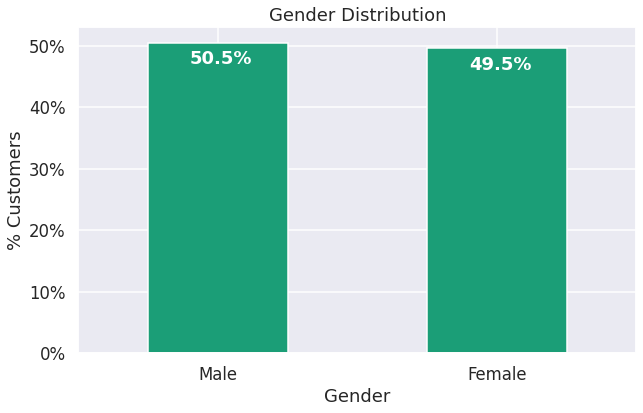

In [ ]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
rcParams['figure.figsize']=10,6

ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

Above plot shows almost equal number of male and female customers; 50.5% are male customers while the other 49.5% are female. Below pie chart shows 16.2% senior citizens customer. Thus most of the customers in the data are younger people.

Text(0.5, 1.0, '% of Senior Citizens')

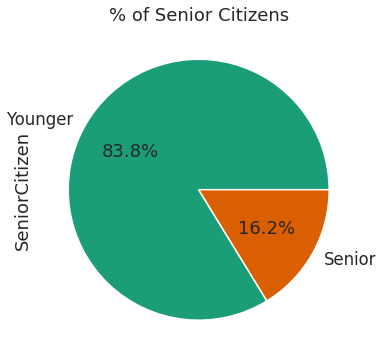

In [ ]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Younger', 'Senior'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens')

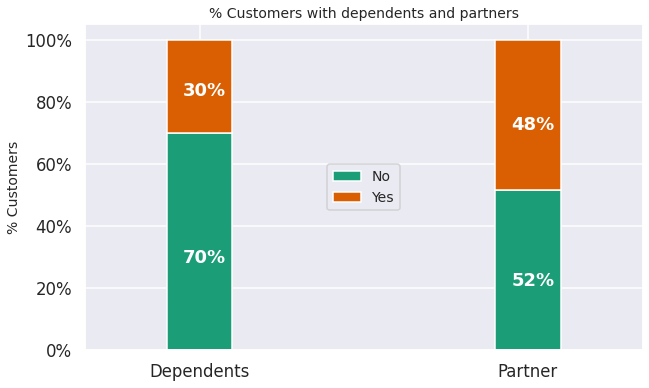

In [ ]:
df = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df1 = df.groupby(['variable','value']).count().unstack()
df1 = df1*100/len(data)
ax = df1.loc[:,'customerID'].plot.bar(stacked=True, figsize=(10,6),rot = 0,width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

From above plot, it can be seen that, 48% of the customers have a partner channel, while only 30% of the total customers have dependents.

It would be interesting is to look at the % of customers with both partners and dependents

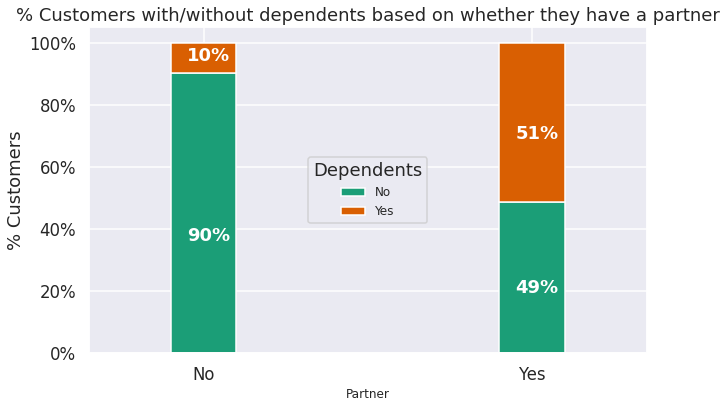

In [ ]:
partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':12},title = 'Dependents')
ax.set_ylabel('% Customers')
ax.set_title('% Customers with/without dependents based on whether they have a partner')
ax.xaxis.label.set_size(12)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

Interestingly, among the customers who have a partner, only about half of them (51%) also have a dependent, while other half (49%) do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (90%) of them do not have any dependents

A review of any differences between the % of customers with/without dependents and partners by gender reveal that, there is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender

#Customer Account Information

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of Customers by tenure')

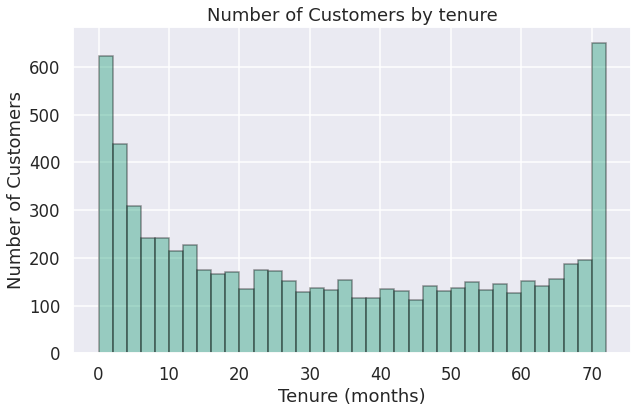

In [ ]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by tenure')

The above histogram displays a lot of customers have been with the telecom company for just a month, while quite a many are there for about 70 months. This could be potentially because of different contractual agrrement some customers might have.

Text(0.5, 1.0, 'Number of Customers by Contract Type')

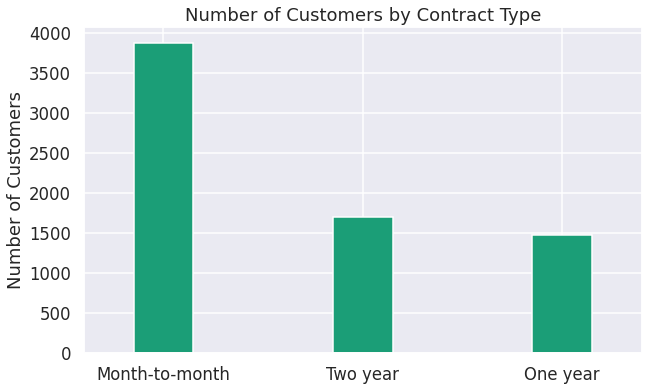

In [ ]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. This is also visible on the correlation chart with the churn rate. More of less equal number of customers in the 1 year and 2 year contracts; around 1500 customers are on 1 year contract and close to around 1700 customers are on 2 years contracts

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Contract')

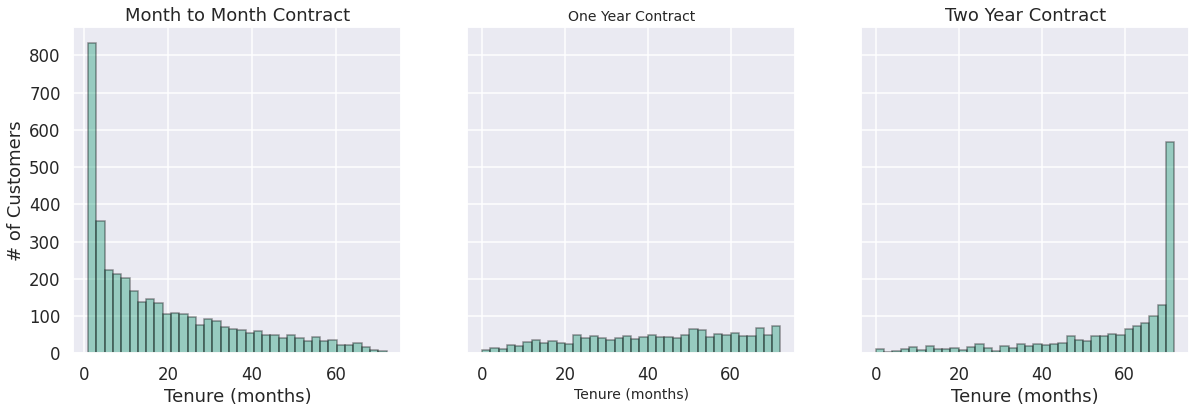

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

#Visualization of the distribution of various services used by customers

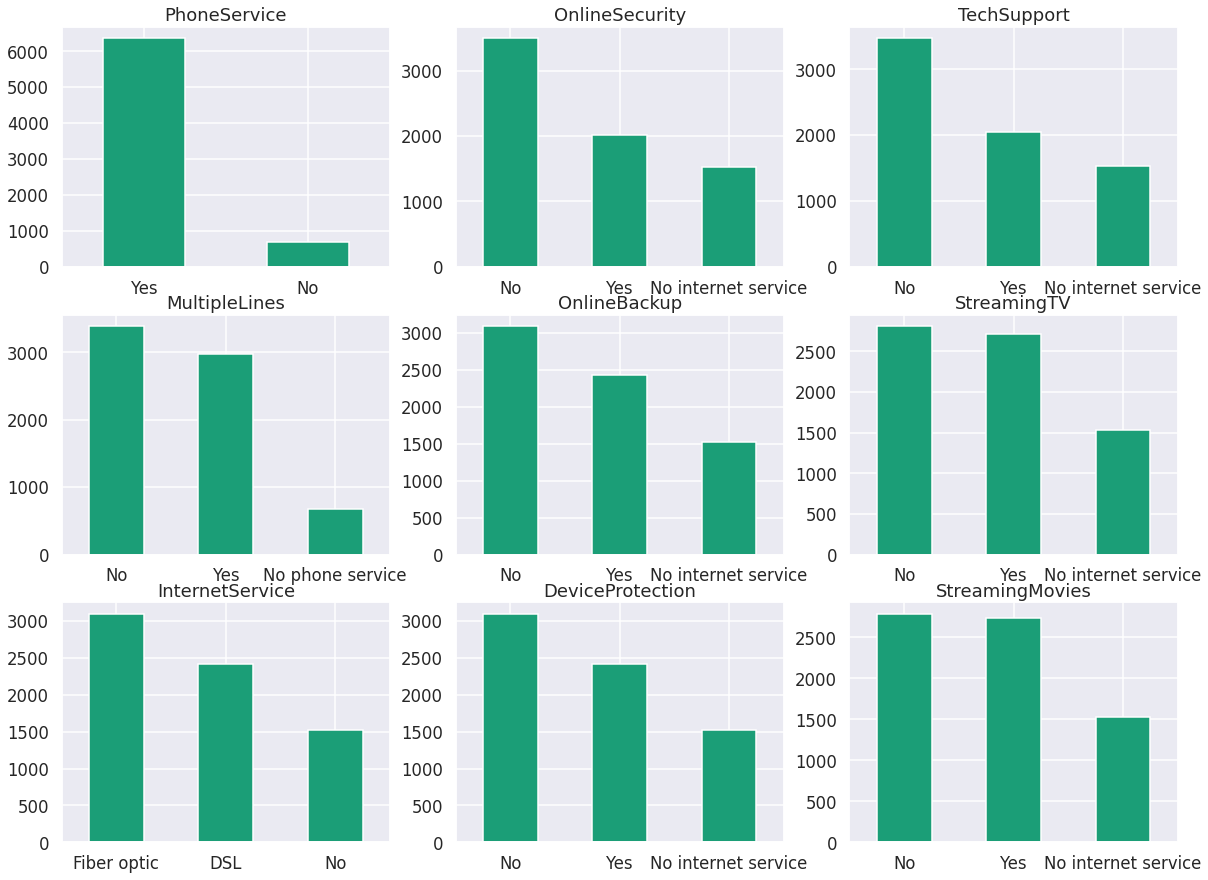

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,15))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

#Datamining to check prediction variable and it's interaction with other variable

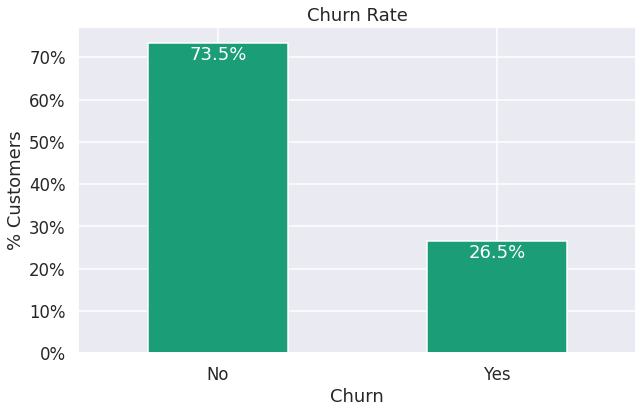

In [ ]:
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', color='white')


26.5% churn rate is cosidered quite high. However, 73.5 % of the customers do not churn. Clearly the data is skewed as it is always expected that a large majority of the customers to not churn. Skeweness could lead to a lot of false negatives in predictive modeling

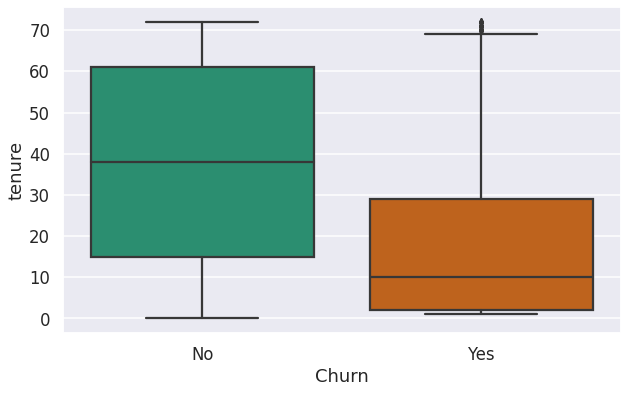

In [ ]:

sns.boxplot(x = data.Churn, y = data.tenure)

Text(0, 0.5, 'Monthly Charges')

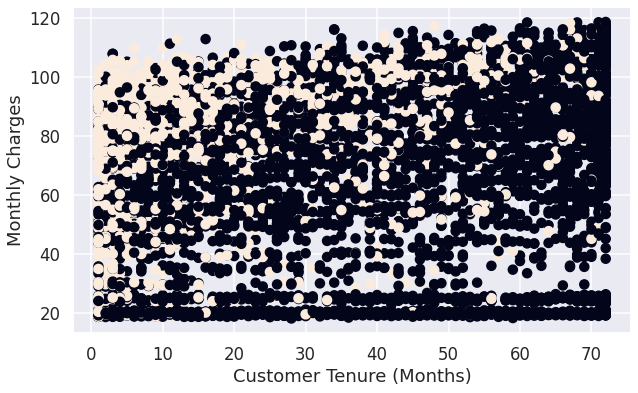

In [ ]:
rcParams['figure.figsize']=10,6
sns.set(style='darkgrid', context='talk', palette='Dark2')

plt.scatter(
   df_dummies['tenure'], 
 df_dummies['MonthlyCharges'], c=df_dummies['Churn'])
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Monthly Charges')

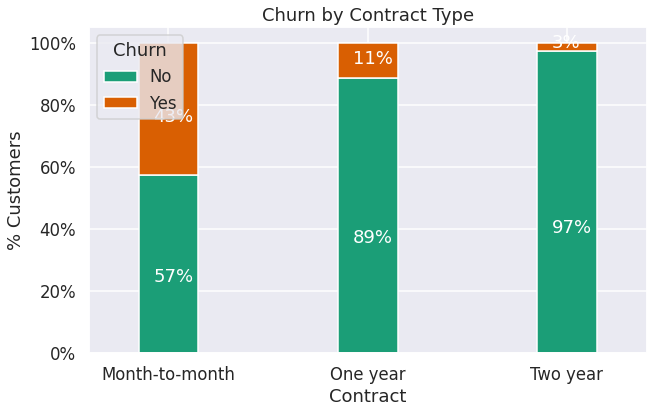

In [ ]:
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

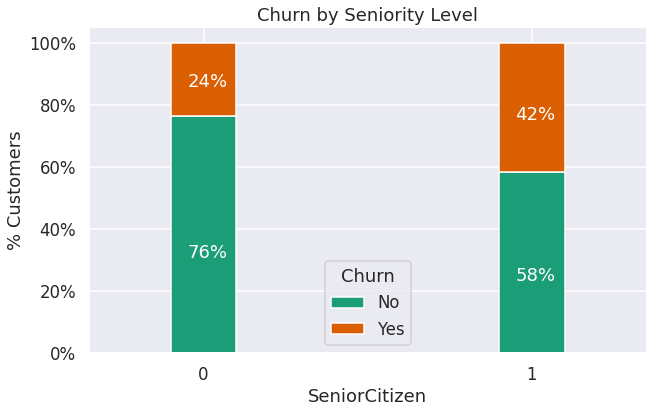

In [ ]:

seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

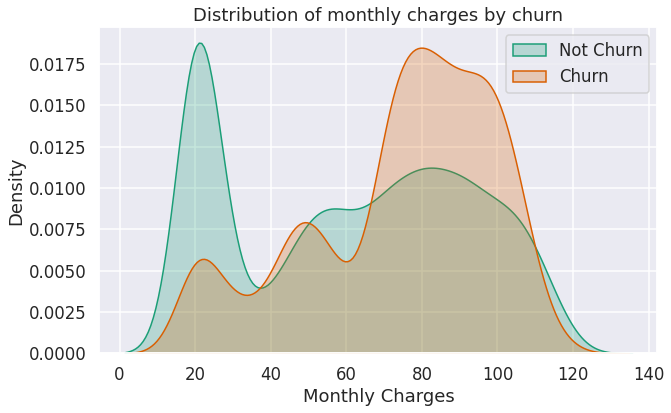

In [ ]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], shade=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, shade= True)
ax.legend(["Not Churn","Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

#
Predictive modelling

In [ ]:
df_dummies = df_dummies.drop("TotalCharges", axis=1) # removing Total Charges to avoid multicolinearity.

# Using the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Methodology

# Spiliting the data

X is the data with the independent variables, Y is the data with the dependent variable. The test size variable determines in which ratio the data will be split. It is quite common to do this in a 80 Training / 20 Test ratio. Also ned to stratify the train-test-split to have a balanced split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


# Logistical regresion

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
y_pred = prediction_test #prediction

# Print the prediction accuracy
print ("Prdiction:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Prdiction: 0.8017057569296375
Precision: 0.6655052264808362
Recall: 0.5106951871657754


In [ ]:
print('Intercept: ' + str(result.intercept_)) # reporting the intercept
print('Regression: ' + str(result.coef_)) # reporting the co-efficients

Intercept: [-0.98796453]
Regression: [[ 0.18715203 -2.43931051 -0.00852663  0.01488481 -0.01485236  0.01063183
  -0.01059938  0.11062872 -0.11059627  0.11728073 -0.11724828 -0.17017432
   0.11728073  0.05292604 -0.45958971  0.56526352 -0.10564136  0.22501643
  -0.10564136 -0.11934262  0.11825689 -0.10564136 -0.01258308  0.04802402
  -0.10564136  0.05764979  0.2254066  -0.10564136 -0.11973279 -0.08884815
  -0.10564136  0.19452196 -0.08917765 -0.10564136  0.19485147  0.6214897
  -0.04373557 -0.57772168 -0.15446256  0.15449501 -0.03627493 -0.15979595
   0.24576997 -0.04966664]]


Confusion matrix
[[937  96]
 [183 191]]


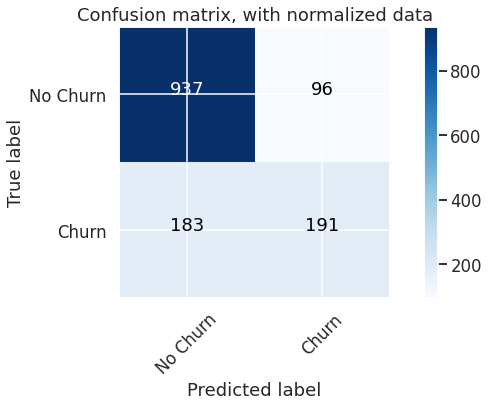

In [ ]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Confusion matrix, with normalized data')

# Gap

In [ ]:
#F1 Score
f1 = (2*0.6577181208053692*0.5521126760563381)/(0.6577181208053692 + 0.5521126760563381)
print("F1 Score {:0.2f}".format(f1))


F1 Score 0.60


In [ ]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.621490
InternetService_Fiber optic                0.565264
PaymentMethod_Electronic check             0.245770
TechSupport_No                             0.225407
OnlineSecurity_No                          0.225016
StreamingMovies_Yes                        0.194851
StreamingTV_Yes                            0.194522
SeniorCitizen                              0.187152
PaperlessBilling_Yes                       0.154495
OnlineBackup_No                            0.118257
PhoneService_No                            0.117281
MultipleLines_No phone service             0.117281
Dependents_No                              0.110629
DeviceProtection_Yes                       0.057650
MultipleLines_Yes                          0.052926
DeviceProtection_No                        0.048024
gender_Female                              0.014885
Partner_No                                 0.010632
MonthlyCharges                            -0.008527
Partner_Yes 

In [ ]:
df_dummies['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

The classification rate of 80%, considered as good accuracy. However, it may not be the right measure at times, when the data is skewed and target class is not balanced . So, additional measures like Precision, Recall, F score (combined metric) have been considered

In [ ]:
from sklearn.utils import resample
 
data_majority = df_dummies[df_dummies['Churn']==0]
data_minority = df_dummies[df_dummies['Churn']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5163, #same number of samples as majority class
random_state=1) #set the seed for random resampling

# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
data_upsampled['Churn'].value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(result, X_train, y_train, scoring='accuracy', cv=10)
print (' 10 fold cross-validation scores: ' ,scores)
print('Mean of scores: ', scores.mean())

 10 fold cross-validation scores:  [0.79 0.81 0.81 0.81 0.79 0.77 0.83 0.8  0.8  0.82]
Mean of scores:  0.8033801508188846


# Survival Analysis

Kapalan-Meier and Cox Proportional Hazards Model

- Number of customers surviving at t is S(t)*P  
- number of customers surviving at t+dt is S(t+dt)*P. 
- Number of customers left during dt is (S(t) -S(t + dt))*P. 
- Instantaneous rate of customers leaving at time t is (S(t) -S(t + dt))*P/dt.

For each customer, two important data points for survival analysis are required

Tenure’: how long they have been a customer when the data is observed ‘Churn’: whether or not the customer left when the data was observed

# Kaplan-Meier

In [ ]:
# transform tenure and churn features
data['tenure'] = data['tenure'].astype(float)
data['Churn'] = data['Churn'] == 'Yes'
data.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85  False
1  5575-GNVDE    Male              0  ...          56.95       1889.5  False
2  3668-QPYBK    Male              0  ...          53.85       108.15   True
3  7795-CFOCW    Male              0  ...          42.30      1840.75  False
4  9237-HQITU  Female              0  ...          70.70       151.65   True

[5 rows x 21 columns]

In [ ]:
!pip install lifelines

import lifelines

from lifelines import KaplanMeierFitter

# fitting kmf to churn data
t = data['tenure']
churn = data['Churn']
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, churn, label='Estimate for Average Customer')

     |████████████████████████████████| 348 kB 4.8 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=3369d9fc4a94e3dd18cb79e9bba70a8a961e02324ef36b85ee26c108eb0dd111
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 7043 total observations, 5174 right-censored observations>

In [ ]:
# fitting kmf to churn data
t = data['tenure']
churn = data['Churn']
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, churn, label='Estimate for Average Customer')

<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 7043 total observations, 5174 right-censored observations>

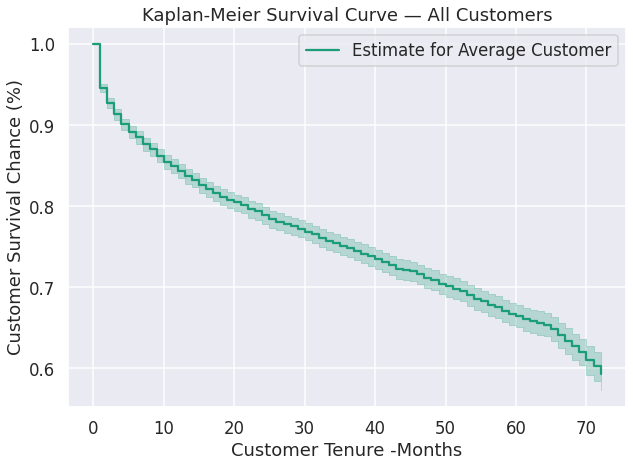

In [ ]:
# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer Tenure -Months')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/Telecom/Telecom_New.csv')
a.head(2)

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No

[2 rows x 21 columns]

In [ ]:
dummies = pd.get_dummies(a[[
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'
]])
a = dummies.join(a[['MonthlyCharges', 'TotalCharges']])

In [ ]:
a['TotalCharges'] = a[['TotalCharges']].replace([' '], '0')
a['TotalCharges'] = pd.to_numeric(a['TotalCharges'])

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   gender_Female                            7043 non-null   uint8  
 3   gender_Male                              7043 non-null   uint8  
 4   Partner_No                               7043 non-null   uint8  
 5   Partner_Yes                              7043 non-null   uint8  
 6   Dependents_No                            7043 non-null   uint8  
 7   Dependents_Yes                           7043 non-null   uint8  
 8   PhoneService_No                          7043 non-null   uint8  
 9   PhoneService_Yes                         7043 non-null   uint8  
 10  MultipleLines_No                         7043 no

In [ ]:
a = a[['SeniorCitizen',
       'tenure',
       'gender_Female',
       'Partner_Yes',
       'Dependents_Yes',
       'PhoneService_Yes',
       'MultipleLines_Yes',
       'InternetService_DSL',
       'InternetService_Fiber optic',
       'OnlineSecurity_Yes',
       'OnlineBackup_Yes',
       'DeviceProtection_Yes',
       'TechSupport_Yes',
       'StreamingTV_Yes',
       'StreamingMovies_Yes',
       'Contract_One year',
       'Contract_Two year',
       'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check',
       'MonthlyCharges',
       'TotalCharges',
       'Churn_Yes']]

a.head()

SeniorCitizen  tenure  ...  TotalCharges  Churn_Yes
0              0       1  ...         29.85          0
1              0      34  ...       1889.50          0
2              0       2  ...        108.15          1
3              0      45  ...       1840.75          0
4              0       2  ...        151.65          1

[5 rows x 24 columns]

In [ ]:
from lifelines import CoxPHFitter
from scipy.special import logsumexp

cph_train, cph_test = train_test_split(a, test_size=0.2)

# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(cph_train, duration_col='tenure', event_col='Churn_Yes', robust=True)   ## Fit the data to train the model
cph.print_summary(model="telecom churn prediction variables", decimals=3)    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4168 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
          robust variance = True
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1466
   partial log-likelihood = -9621.696
         time fit was run = 2021-07-31 22:48:07 UTC
                    model = telecom churn prediction variables

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                       
SeniorCitizen                            0.052      1.053      0.056           -0.058            0.162                0.944                1.175
gender_Female                            0.025      1.025      0.048           -0.069            0.118                0.934                1.126
Partner_Yes                             -0.210      0.811      0.055           -0.317           -0.103                0.728                0.902
Dependents_Yes                          -0.121      0.886      0.075           -0.267            0.025                0.766                1.026
PhoneService_Yes                         0.428      1.535      0.482           -0.516            1.372                0.597                3.944
MultipleLines_Yes                        0.041      1.042      0.124           -0.201            0.284                0.818                1.328
InternetService_DSL                      1.689      5.415      0.633            0.448            2.931                1.565               18.737
InternetService_Fiber optic              2.226      9.259      1.176           -0.080            4.531                0.923               92.886
OnlineSecurity_Yes                      -0.305      0.737      0.134           -0.568           -0.042                0.567                0.959
OnlineBackup_Yes                        -0.140      0.869      0.125           -0.386            0.106                0.680                1.111
DeviceProtection_Yes                     0.019      1.019      0.127           -0.230            0.268                0.795                1.307
TechSupport_Yes                         -0.260      0.771      0.132           -0.520           -0.001                0.595                0.999
StreamingTV_Yes                          0.091      1.095      0.232           -0.364            0.546                0.695                1.726
StreamingMovies_Yes                      0.138      1.148      0.234           -0.319            0.596                0.727                1.815
Contract_One year                       -1.364      0.256      0.143           -1.644           -1.085                0.193                0.338
Contract_Two year                       -3.820      0.022      0.304           -4.416           -3.225                0.012                0.040
PaperlessBilling_Yes                     0.156      1.169      0.061            0.037            0.275                1.038                1.316
PaymentMethod_Bank transfer (automatic) -0.539      0.583      0.094           -0.724           -0.354                0.485                0.702
PaymentMethod_Credit card (automatic)   -0.510      0.601      0.094           -0.694           -0.325                0.499                0.723
PaymentMethod_Electronic check          -0.139      0.871      0.075           -0.285            0.008                0.752                1.008
MonthlyCharges                           0.030      1.030      0.023           -0.015            0.075                0.985                1.077
TotalCharges                            -0.002      0.998      0.000           -0.002           -0.001                0.998                0.999

                                              z       

Text(0.5, 1.0, 'Coefficients of Confidence Intervals')

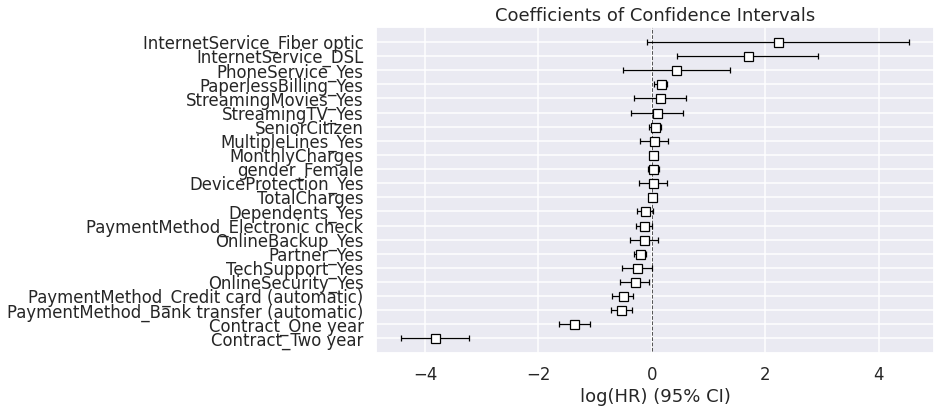

In [ ]:
cph.plot()
plt.title('Coefficients of Confidence Intervals')

# So here we are looking at the different survival curves for customers whose TotalCharges are near zero compared to those 
# whose TotalCharges are closer to 4000.

# Testing the proportional hazard assumptions

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 5634 total observations, 4168 right-censored observations>
         test_name = proportional_hazard_test

---
                                              test_statistic      p  -log2(p)
Contract_One year                       km             99.58 <0.005     75.49
                                        rank           84.34 <0.005     64.38
Contract_Two year                       km             84.30 <0.005     64.35
                                        rank           67.15 <0.005     51.82
Dependents_Yes                          km              1.27   0.26      1.94
                                        rank            0.95   0.33      1.60
DeviceProtection_Yes                    km              0.06   0.81      0.30
                                        rank            0.99   0.32      1.65
InternetService_DSL                     km              5.73   0.02      5.91
                                        rank            9.77 <0.005      9.14
InternetService_Fiber optic             km              2.16   0.14      2.82
                                        rank            5.01   0.03      5.31
MonthlyCharges                          km              0.90   0.34      1.54
                                        rank            0.19   0.67      0.59
MultipleLines_Yes                       km              0.16   0.69      0.54
                                        rank            2.17   0.14      2.83
OnlineBackup_Yes                        km              0.09   0.77      0.39
                                        rank            1.18   0.28      1.85
OnlineSecurity_Yes                      km              0.09   0.76      0.39
                                        rank            1.39   0.24      2.07
PaperlessBilling_Yes                    km              0.04   0.84      0.26
                                        rank            0.02   0.90      0.16
Partner_Yes                             km              1.25   0.26      1.92
                                        rank            2.51   0.11      3.14
PaymentMethod_Bank transfer (automatic) km              1.07   0.30      1.73
                                        rank            4.25   0.04      4.67
PaymentMethod_Credit card (automatic)   km              5.37   0.02      5.61
                                        rank            9.48 <0.005      8.91
PaymentMethod_Electronic check          km              1.67   0.20      2.35
                                        rank            3.63   0.06      4.14
PhoneService_Yes                        km              0.26   0.61      0.71
                                        rank            1.56   0.21      2.24
SeniorCitizen                           km              1.06   0.30      1.72
                                        rank            0.24   0.62      0.68
StreamingMovies_Yes                     km              0.01   0.91      0.13
                                        rank            0.67   0.41      1.28
StreamingTV_Yes                         km              0.33   0.57      0.82
                                        rank            1.53   0.22      2.21
TechSupport_Yes                         km              0.44   0.51      0.97
                                        rank            2.01   0.16      2.68
TotalCharges                            km             84.64 <0.005     64.60
                                        rank           12.61 <0.005     11.34
gender_Female                           km              0.00   0.96      0.05
                                        rank            0.16   0.69      0.54



1. Variable 'InternetService_DSL' failed the non-proportional test: p-value is 0.0018.

   Advice: with so few unique values (only 2), you can include `strata=['InternetService_DSL', ...]`
in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'InternetService_Fiber optic' failed the non-proportional test: p-value is 0.0252.

   Advice: with so few unique values (only 2), you can include `strata=['InternetService_Fiber
optic', ...]` in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


3. Variable 'Contract_One year' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['Contract_One year', ...]`
in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


4. Variable 'Contract_Two year' failed the non-proportional test: p-value 

[[<matplotlib.axes._subplots.AxesSubplot at 0x7f7d9ffd5650>,

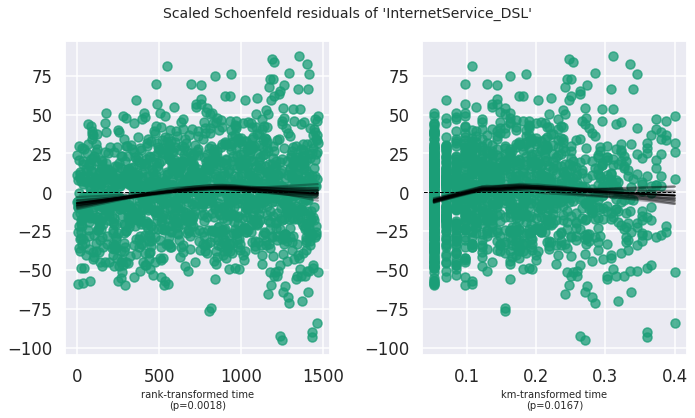

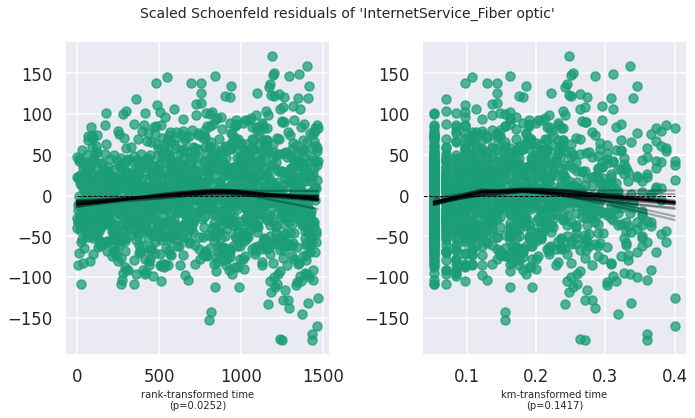

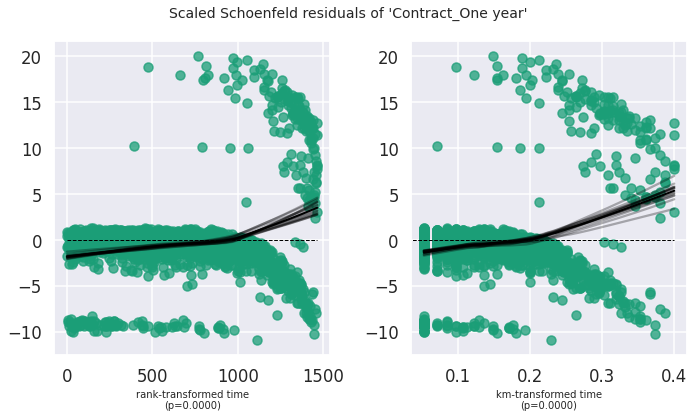

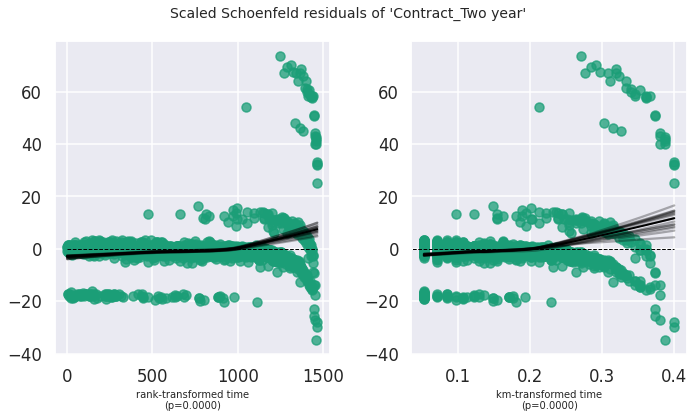

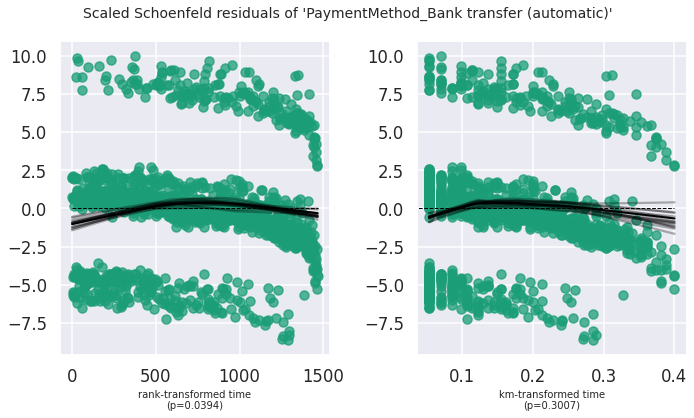

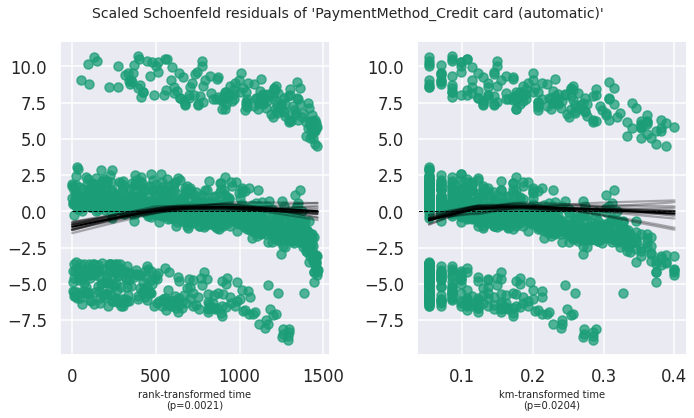

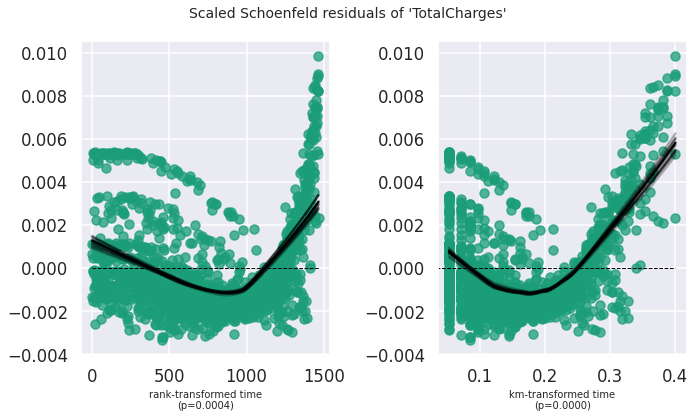

In [ ]:
cph.check_assumptions(cph_train, p_value_threshold=0.05, show_plots=True)

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


In [ ]:
from sklearn.utils import resample
 
data_majority = df_dummies[df_dummies['Churn']==0]
data_minority = df_dummies[df_dummies['Churn']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5163, #same number of samples as majority class
random_state=1) #set the seed for random resampling

# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
data_upsampled['Churn'].value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

Head of the dummied and reduced dataset; Gender_Male has disappeared, as has Partner_No, Dependents_No and so on. For any matrix-based regression , Singular Matrices always throw an error in Python . Therefore, had to throw one of the colulmns away while creating dummy variables. We will still be able to infer the missing category from the remaining variables

#For CoxPH test

Churn column is the event observation in the single dataset that’s passed to the fit call. Need to split dataset in two (train and test).

In [ ]:
from lifelines import CoxPHFitter
from scipy.special import logsumexp

cph_train, cph_test = train_test_split(a, test_size=0.2)

# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(cph_train, duration_col='tenure', event_col='Churn_Yes', robust=True)   ## Fit the data to train the model
cph.print_summary(model="telecom churn prediction variables", decimals=3)    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4152 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
          robust variance = True
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1482
   partial log-likelihood = -9678.781
         time fit was run = 2021-07-31 22:50:07 UTC
                    model = telecom churn prediction variables

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                       
SeniorCitizen                            0.045      1.046      0.056           -0.065            0.155                0.937                1.168
gender_Female                            0.043      1.044      0.047           -0.049            0.135                0.952                1.145
Partner_Yes                             -0.187      0.830      0.054           -0.292           -0.081                0.746                0.922
Dependents_Yes                          -0.091      0.913      0.074           -0.235            0.053                0.790                1.055
PhoneService_Yes                         0.989      2.688      0.480            0.048            1.930                1.049                6.888
MultipleLines_Yes                        0.113      1.120      0.123           -0.128            0.354                0.880                1.424
InternetService_DSL                      2.499     12.175      0.637            1.250            3.748                3.492               42.451
InternetService_Fiber optic              3.692     40.113      1.174            1.390            5.993                4.015              400.789
OnlineSecurity_Yes                      -0.195      0.823      0.131           -0.451            0.061                0.637                1.063
OnlineBackup_Yes                        -0.029      0.972      0.126           -0.275            0.217                0.760                1.243
DeviceProtection_Yes                     0.132      1.141      0.126           -0.115            0.380                0.891                1.462
TechSupport_Yes                         -0.033      0.968      0.130           -0.287            0.222                0.750                1.248
StreamingTV_Yes                          0.353      1.423      0.232           -0.102            0.808                0.903                2.243
StreamingMovies_Yes                      0.352      1.421      0.231           -0.100            0.803                0.905                2.233
Contract_One year                       -1.251      0.286      0.131           -1.509           -0.994                0.221                0.370
Contract_Two year                       -3.592      0.028      0.296           -4.171           -3.013                0.015                0.049
PaperlessBilling_Yes                     0.165      1.179      0.061            0.045            0.284                1.046                1.329
PaymentMethod_Bank transfer (automatic) -0.518      0.596      0.092           -0.698           -0.338                0.498                0.713
PaymentMethod_Credit card (automatic)   -0.546      0.579      0.092           -0.727           -0.365                0.483                0.694
PaymentMethod_Electronic check          -0.173      0.841      0.074           -0.318           -0.028                0.728                0.972
MonthlyCharges                           0.009      1.009      0.023           -0.035            0.054                0.965                1.055
TotalCharges                            -0.002      0.998      0.000           -0.002           -0.002                0.998                0.998

                                              z       

bservations can come with weights, as well interms of weights may be integer values representing some commonly occurring observation, or they may be float values representing some sampling weights (e.g. inverse probability weights). When using sampling weights, it's correct to also change the standard error calculations. So, used robust fit method.¶
The summary statistics above indicates the significance of the covariates in predicting the churn risk.
In the above regression, the key output is exp(coef). This is interpreted as the scaling of hazard risk for each additional unit of the variable, 1.00 being neutral.
Customers whose PaymentMethod_Electronic check are more likely to churn; likewise, paperless billing customers are more likely to cancel their servie (1.12 times). Below plot displays a clear image of expected churn placed in order from high to low risk.
Internet service (DSL & Fiber), contract ( 1& 2 years), payment method and total charges play significant role in predicting the churn, whereas all the other covariates are not significant.
Interesting point to note here is that , the β (coef ) values in case of covariates TotalCharges is zero (~-0.00), but still the TotalCharges plays a significant role in predicting churn. The reason is that the MonthlyCharges is continuous value and it can vary from the order of tens, hundreds to thousands, when multiplied by the small coef (β=-0.01), it becomes significant.
We can see the number of observations listed as n=5634, number of events (churned customers)=1482 coefficients of the model are very important and they tell us how each feature increases risk. The positive number that attribute makes a customer more likely to churn, and negative means customers are less likely to churn.
We get the concordance (0.929 = 0.93). This is an assessment of how internally consistent the model is. Concordance of 0.93 suggests a good model. The concordance score evaluates the relative rankings of subject's event times i.e. we can multiple by a positive constant, or add a constant, and the rankings won't change). A model maximized for concordance- index will give good predicted rankings.

Text(0.5, 1.0, 'Coefficients of Confidence Intervals')

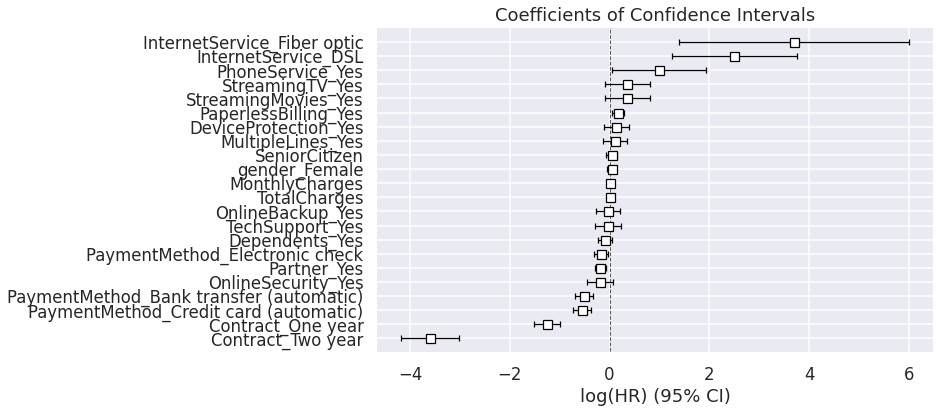

In [ ]:
cph.plot()
plt.title('Coefficients of Confidence Intervals')

# So here we are looking at the different survival curves for customers whose TotalCharges are near zero compared to those 
# whose TotalCharges are closer to 4000.

The ``p_value_threshold`` is set at 0.15. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 5634 total observations, 4152 right-censored observations>
         test_name = proportional_hazard_test

---
                                              test_statistic      p  -log2(p)
Contract_One year                       km             55.56 <0.005     43.33
                                        rank           48.94 <0.005     38.46
Contract_Two year                       km             64.04 <0.005     49.54
                                        rank           51.40 <0.005     40.27
Dependents_Yes                          km              0.98   0.32      1.63
                                        rank            0.90   0.34      1.54
DeviceProtection_Yes                    km              0.13   0.72      0.47
                                        rank            0.76   0.38      1.39
InternetService_DSL                     km              5.63   0.02      5.82
                                        rank            8.58 <0.005      8.20
InternetService_Fiber optic             km              3.10   0.08      3.68
                                        rank            5.32   0.02      5.57
MonthlyCharges                          km              0.23   0.63      0.67
                                        rank            0.05   0.82      0.29
MultipleLines_Yes                       km              0.61   0.43      1.20
                                        rank            2.32   0.13      2.97
OnlineBackup_Yes                        km              0.36   0.55      0.87
                                        rank            1.31   0.25      1.99
OnlineSecurity_Yes                      km              0.60   0.44      1.19
                                        rank            1.79   0.18      2.47
PaperlessBilling_Yes                    km              0.17   0.68      0.56
                                        rank            0.04   0.85      0.24
Partner_Yes                             km              5.43   0.02      5.66
                                        rank            8.77 <0.005      8.35
PaymentMethod_Bank transfer (automatic) km              0.08   0.77      0.37
                                        rank            1.48   0.22      2.16
PaymentMethod_Credit card (automatic)   km              4.23   0.04      4.65
                                        rank            7.31   0.01      7.19
PaymentMethod_Electronic check          km              0.84   0.36      1.48
                                        rank            2.46   0.12      3.10
PhoneService_Yes                        km              0.93   0.33      1.58
                                        rank            2.33   0.13      2.98
SeniorCitizen                           km              6.67   0.01      6.67
                                        rank            4.43   0.04      4.82
StreamingMovies_Yes                     km              1.26   0.26      1.94
                                        rank            2.39   0.12      3.03
StreamingTV_Yes                         km              0.83   0.36      1.46
                                        rank            1.91   0.17      2.58
TechSupport_Yes                         km              1.63   0.20      2.31
                                        rank            3.27   0.07      3.82
TotalCharges                            km             72.42 <0.005     55.67
                                        rank            9.70 <0.005      9.09
gender_Female                           km              1.33   0.25      2.01
                                        rank            1.74   0.19      2.42



1. Variable 'SeniorCitizen' failed the non-proportional test: p-value is 0.0098.

   Advice: with so few unique values (only 2), you can include `strata=['SeniorCitizen', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'Partner_Yes' failed the non-proportional test: p-value is 0.0031.

   Advice: with so few unique values (only 2), you can include `strata=['Partner_Yes', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


3. Variable 'PhoneService_Yes' failed the non-proportional test: p-value is 0.1267.

   Advice: with so few unique values (only 2), you can include `strata=['PhoneService_Yes', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


4. Variable 'MultipleLines_Yes' failed the non-proportional test: p-value is 0.1280.

   Advice: with so few unique valu

[[<matplotlib.axes._subplots.AxesSubplot at 0x7f7da000f650>,

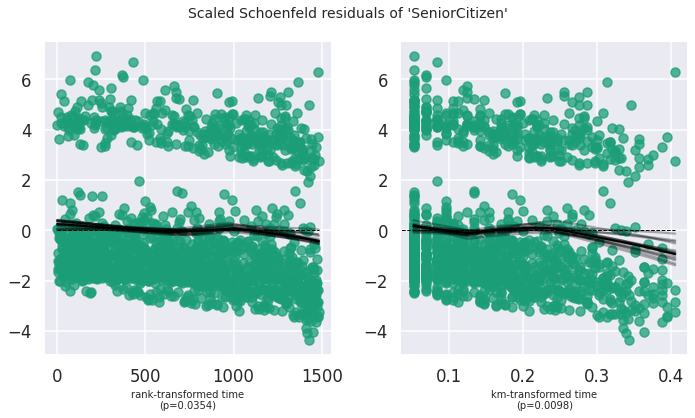

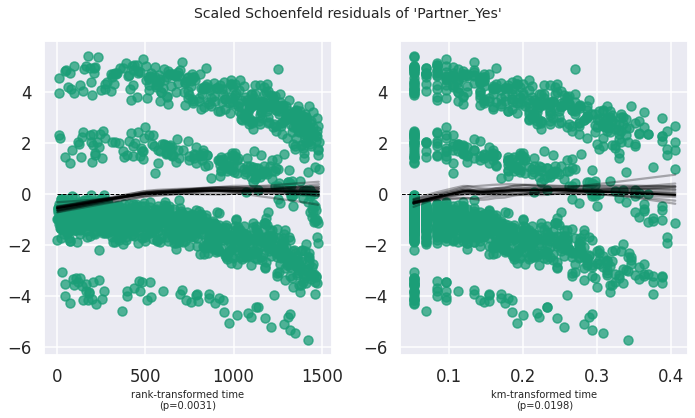

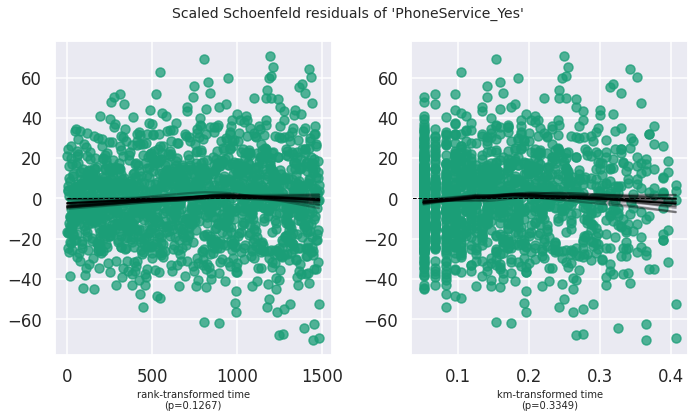

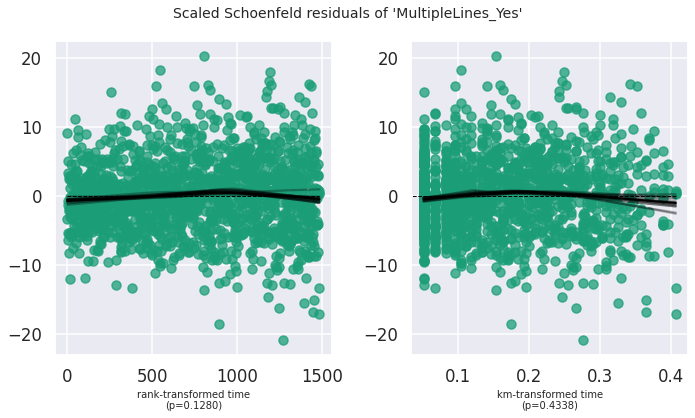

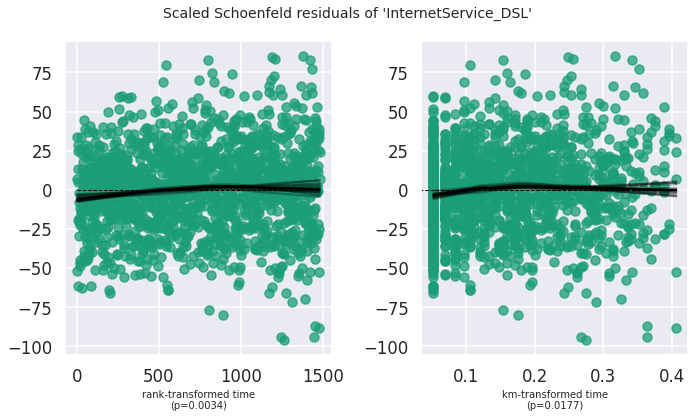

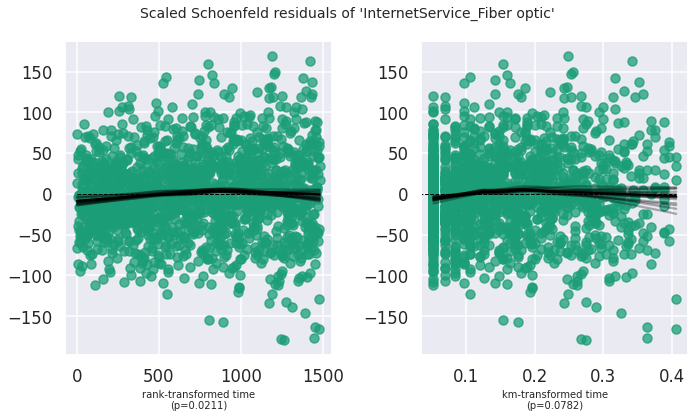

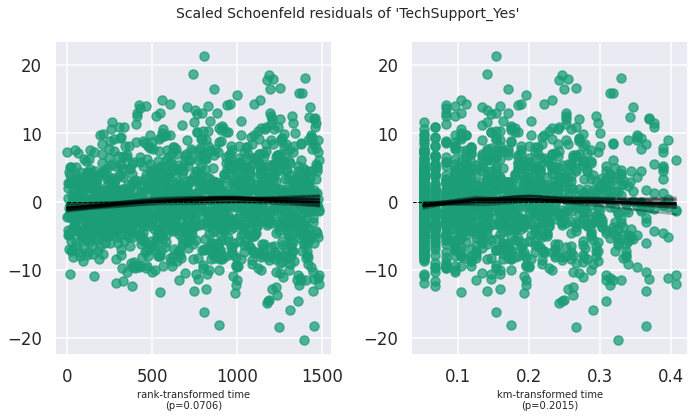

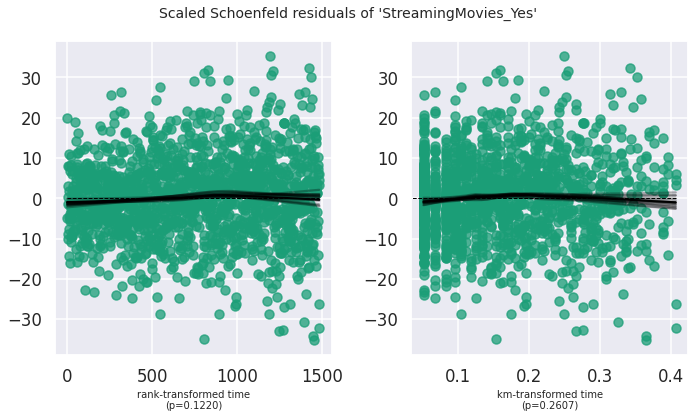

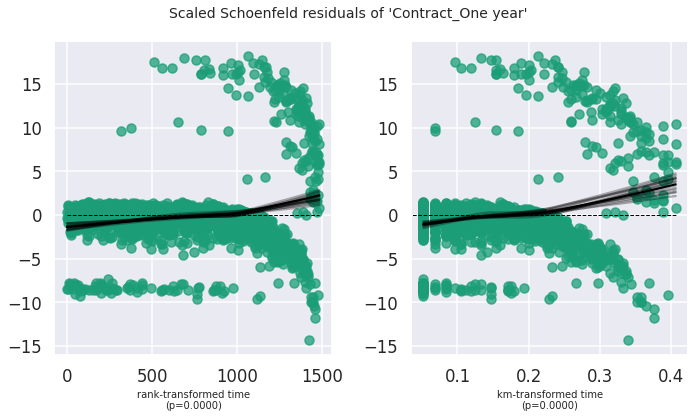

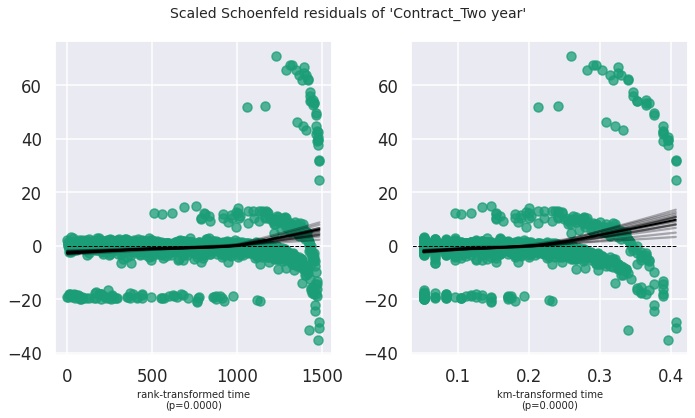

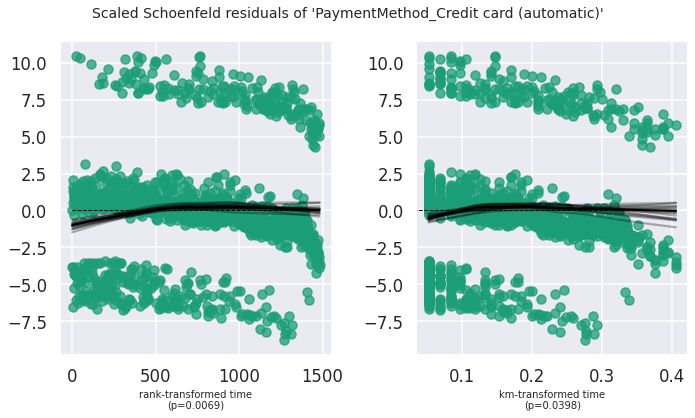

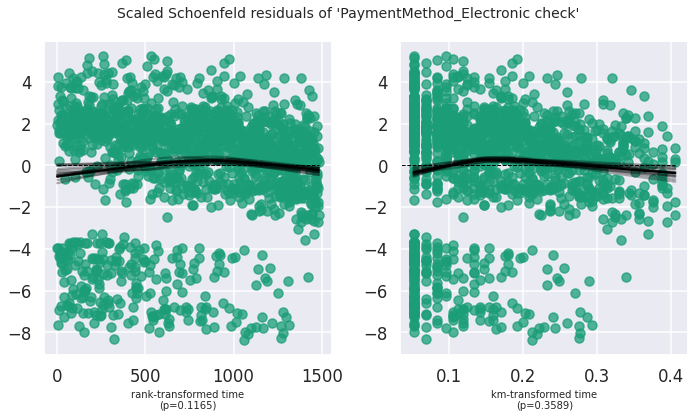

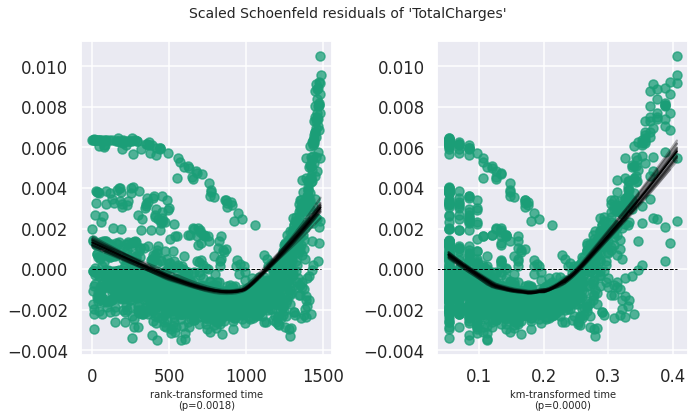

In [ ]:
cph.check_assumptions(cph_train, p_value_threshold= 0.15, show_plots=True)


Applied ‘unconditioned’ survival functions because some of these curves will predict churn before the customer’s current tenure time. Moreover, need to condition the predictions on the basis that the customers were still with with the company when the data was collected.

The individual customers can be investigated from survival curve and see how the conditioning has affected their survival over the baseline rate.

In [ ]:
from lifelines.datasets import load_regression_dataset

df = load_regression_dataset()

censored_subjects = a.loc[a['Churn_Yes'] == 0]
unconditioned_sf = cph.predict_survival_function(censored_subjects)
conditioned_sf = unconditioned_sf.apply(lambda c: (c / c.loc[a.loc[c.name, 'tenure']]).clip_upper(1))

AttributeError: ignored

In [ ]:
subject = 12
unconditioned_sf[subject].plot(ls="--", label="unconditioned")
conditioned_sf[subject].plot(label="conditioned on $T>58$")
plt.legend()
plt.title('Survival Curve')

In [ ]:

from lifelines.utils import median_survival_times, qth_survival_times

predictions_50 = median_survival_times(conditioned_sf)
# This is the same, but you can change the fraction to get other %tiles. 
# predictions_50 = qth_survival_times(.50, conditioned_sf)

In [ ]:
# transform tenure and churn features
data['tenure'] = data['tenure'].astype(float)
data['Churn'] = data['Churn'] == 'Yes' 
data.head()

In [ ]:
# fitting kmf to churn data
t = data['tenure'].values
#t = data[‘tenure'].values
churn = data['Churn'].values
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, event_observed=churn, label='Estimate for Average Customer')
# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer Tenure (Months)')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

In [ ]:
a= pd.read_csv('/content/drive/MyDrive/Telecom/Telecom_New.csv')  #a= pd.read_csv
dummies = pd.get_dummies(a[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' ]])
a = dummies.join(a[['MonthlyCharges', 'TotalCharges']])
a['TotalCharges'] = a[['TotalCharges']].replace([' '], '0')
a['TotalCharges'] = pd.to_numeric(a['TotalCharges'])
a = a[['SeniorCitizen', 'tenure', 'gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'Churn_Yes']]
a.head()

